# LEVEL 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/restaurent.csv')
dataset.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
dataset.isna().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


### TASK 1
####Top Cuisines
* Determine the top three most
common cuisines in the dataset.
* Calculate the percentage of
restaurants that serve each of the top
cuisines.


In [ ]:
top_cuisines = dataset['Cuisines'].value_counts().head(3)
top_cuisines

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354


In [ ]:
restaurants_with_top_cuisines = dataset[dataset['Cuisines'].isin(top_cuisines.index)]
percentages = (restaurants_with_top_cuisines['Cuisines'].value_counts() / len(restaurants_with_top_cuisines)) * 100
percentages

,count
Cuisines,
North Indian,51.971127
"North Indian, Chinese",28.373126
Chinese,19.655747




---


### TASK 2
####City Analysis
* Identify the city with the highest number
of restaurants in the dataset.
* Calculate the average rating for
restaurants in each city.
* Determine the city with the highest
average rating.

In [ ]:
city_counts = dataset['City'].value_counts()
city_counts

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Panchkula,1
Mc Millan,1
Mayfield,1


In [ ]:
average_ratings = dataset.groupby('City')['Aggregate rating'].mean()
average_ratings

,Aggregate rating
City,
Abu Dhabi,4.300000
Agra,3.965000
Ahmedabad,4.161905
Albany,3.555000
Allahabad,3.395000
...,...
Weirton,3.900000
Wellington City,4.250000
Winchester Bay,3.200000


In [ ]:
highest_rated_cities = average_ratings.sort_values(ascending=False).head(3)
highest_rated_cities

,Aggregate rating
City,
Inner City,4.90
Quezon City,4.80
Makati City,4.65


---


### TASK 3
####Price Range Distribution
* Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.
* Calculate the percentage of restaurants
in each price range category.

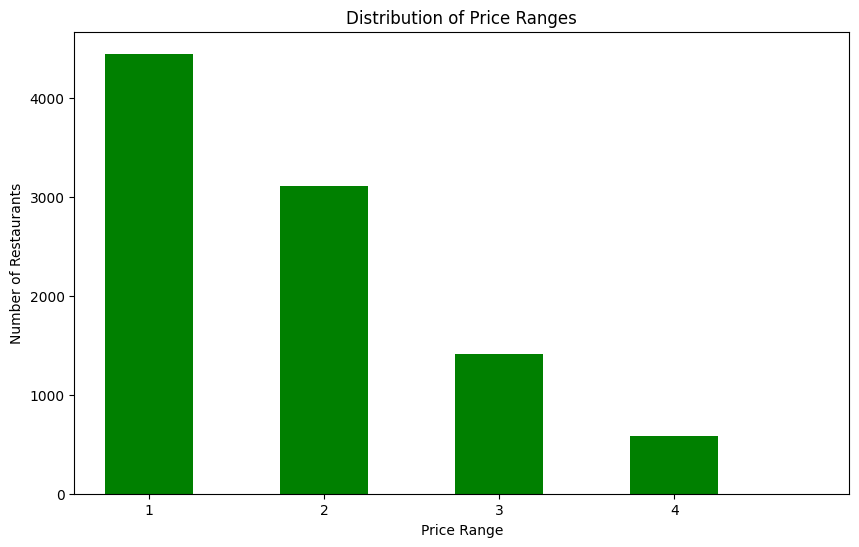

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(dataset['Price range'], bins=range(1,6), align='left', rwidth=0.5, color='green')
plt.xticks(range(1, 6))
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges')
plt.xticks(range(1, 5))
plt.show()

In [ ]:
percentage_price_range = dataset['Price range'].value_counts(normalize=True)* 100
percentage_price_range

,proportion
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


---


### TASK 4
####Online Delivery
* Determine the percentage of restaurants
that offer online delivery.
*Compare the average ratings of restaurants
with and without online delivery.

In [ ]:
online_delivery_counts = (dataset['Has Online delivery'].value_counts(normalize=True))*100
online_delivery_counts

,proportion
Has Online delivery,
No,74.337766
Yes,25.662234


In [ ]:
average_ratings_online_delivery = dataset.groupby('Has Online delivery')['Aggregate rating'].mean()
average_ratings_online_delivery

,Aggregate rating
Has Online delivery,
No,2.465296
Yes,3.248837
